In [2]:
# location of the data files
import os
from models.AE import Autoencoder
from models.AE import CustomCallback
from models.AE import step_decay_schedule
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# run params
SECTION = 'ae_sv'
RUN_ID = '0002'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
RUN_FOLDER = os.path.join("/Users/c.staeding/Documents/Uni/Master/Masterarbeit/Script", RUN_FOLDER)
if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.makedirs(os.path.join(RUN_FOLDER, 'viz_sv'))
    os.makedirs(os.path.join(RUN_FOLDER, 'images_sv'))
    os.makedirs(os.path.join(RUN_FOLDER, 'weights_sv'))

mode =  'build' #'load' 

In [4]:
RUN_FOLDER

'/Users/c.staeding/Documents/Uni/Master/Masterarbeit/Script/run/ae_sv/0002_digits'

In [6]:
from models.AE import Autoencoder
ae_sv = Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2                                  # dimension of latent space
)

if mode == 'build':
    RUN_FOLDER = 'run/ae_sv/0002_digits/viz_sv/viz'
    ae_sv.save(RUN_FOLDER)
else:
    ae_sv.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [7]:
ae_sv.encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder_conv_0 (Conv2D)      (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
encoder_conv_1 (Conv2D)      (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
encoder_conv_2 (Conv2D)      (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 7, 7, 64)          0         
__________

In [8]:
ae_sv.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 14, 14, 64)        0         
__________

In [14]:
from io import StringIO
import numpy as np
import numpy.matlib as npm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

dat = np.loadtxt('/Users/c.staeding/Desktop/HestonTrainSet_ivol_neu_groß.txt')     # train on prices/implied volatilities
NModelPar = 5                                    # number of model parameters 5 for Heston

yy=dat[:len(dat),:NModelPar]                             # model parameters for training data
xx=dat[:len(dat),NModelPar:]                             # output data (prices/implied volatilities)
print(xx.shape)
print(yy.shape)

strikes=np.array([0.500000000000000, 0.537037037037037, 0.574074074074074, 0.611111111111111, 0.648148148148148, 
                  0.685185185185185, 0.722222222222222, 0.759259259259259, 0.796296296296296, 0.833333333333333,
                  0.870370370370370, 0.907407407407407, 0.944444444444444, 0.981481481481481, 1.01851851851852,
                  1.05555555555556,  1.09259259259259,  1.12962962962963,  1.16666666666667, 1.20370370370370,
                  1.24074074074074, 1.27777777777778, 1.31481481481481, 1.35185185185185,   1.38888888888889,
                  1.42592592592593, 1.46296296296296, 1.50000000000000])                   # moneyness

maturities=np.array([0.500000, 0.851852, 1.203704, 1.555556, 1.907407, 2.259259, 2.611111, 2.962963, 3.314815, 
                     3.666667,4.018519, 4.370370, 4.722222, 5.074074, 5.425926, 5.777778, 6.129630, 6.481481, 
                     6.833333, 7.185185, 7.537037, 7.888889, 8.240741, 8.592593, 8.944444, 9.296296, 9.648148,
                     10.000000]) # maturities
weights = np.array([0.1,0.1,0.1,1.0,1.0,1.0,1.0,1.0,0.1,0.1,0.1])
cw = np.ndarray.flatten(npm.repmat(weights,8,1))

(100000, 784)
(100000, 5)


In [17]:
# does scaling makes sense here?
from sklearn.preprocessing import StandardScaler
scalex = StandardScaler()

xx_transform = scalex.fit_transform(xx)

In [18]:
from sklearn.model_selection import train_test_split
x_train_scaled, x_test_scaled, x_train,x_test,y_train, y_test = train_test_split(
    xx_transform, xx, yy, test_size=0.15, random_state=42)  # test_size is the percentage used for validation/test

# the quantities are scaled now!

In [19]:
# define suitable scalings for using with the nets

def xinversetransform(x):
    return scalex.inverse_transform(x)

def yinversetransform(y):
    return scaley.inverse_transform(y)

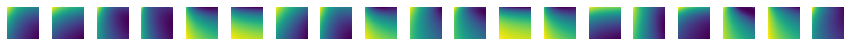

In [20]:
n_to_show = 19
example_idx = np.random.choice(range(len(x_test)), n_to_show)
testsurf = np.reshape(xx,(len(xx),28,28,1))
example_surface = testsurf[example_idx]

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_surface[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')

            
    sub.imshow(img)

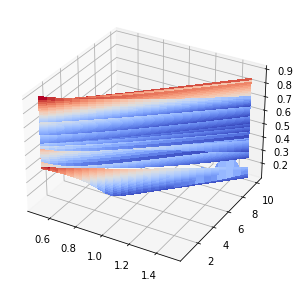

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(5, 5))

ax = fig.gca(projection='3d')
for i in range(n_to_show):
    ax.plot_surface(strikes, maturities, testsurf[i,:,:,0], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

sub.imshow(img, cmap='gray_r')

In [13]:
import numpy as np
outfile_train_x_scaled = "x_train_sv_kappanu_scaled"
outfile_test_x_scaled = "x_test_sv_kappanu_scaled"
outfile_train_x = "x_train_sv_kappanu"
outfile_test_x = "x_test_sv_kappanu"
outfile_train_y = "y_train_sv_kappanu"
outfile_test_y = "y_test_sv_kappanu"

np.savetxt(outfile_train_x_scaled, xinversetransform(x_train_scaled))
np.savetxt(outfile_test_x_scaled, xinversetransform(x_test_scaled))
np.savetxt(outfile_train_x, x_train)
np.savetxt(outfile_test_x, x_test)
# these are just the Heston parameters that may be used for further analysis
np.savetxt(outfile_train_y, y_train)
np.savetxt(outfile_test_y, y_test)


In [14]:
# reshape for using with a cnn within the autoencoder
x_train_scaled_reshape = np.reshape(x_train_scaled,(len(x_train),28,28,1))
x_test_scaled_reshape = np.reshape(x_test_scaled,(len(x_test),28,28,1))

x_train_reshape = np.reshape(x_train,(len(x_train),28,28,1))
x_test_reshape = np.reshape(x_test,(len(x_test),28,28,1))

# Start 

In [15]:
LEARNING_RATE = 0.0005

In [27]:
ae_sv.compile(LEARNING_RATE)

In [17]:
BATCH_SIZE = 32
EPOCHS = 100
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [18]:
# maybe not choose the scaled variables but just x_train
#ae_sv.train(     
#    x_train_scaled_reshape
#    , batch_size = BATCH_SIZE
#    , epochs = EPOCHS
#    , run_folder = RUN_FOLDER
#    , print_every_n_batches = PRINT_EVERY_N_BATCHES
#    , initial_epoch = INITIAL_EPOCH
#)
#
ae_sv.train(     
    x_train_reshape
    , batch_size = BATCH_SIZE
   , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
    , lr_decay = 1
)



Epoch 1/100


2021-12-01 21:19:39.305857: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


85000/85000 [==============================] - 260s 3ms/step - loss: 8.1520e-04

Epoch 00001: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 2/100
85000/85000 [==============================] - 233s 3ms/step - loss: 1.8249e-04

Epoch 00002: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 3/100
85000/85000 [==============================] - 229s 3ms/step - loss: 1.7963e-04

Epoch 00003: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 4/100
85000/85000 [==============================] - 225s 3ms/step - loss: 1.7641e-04

Epoch 00004: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 5/100
85000/85000 [==============================] - 224s 3ms/step - loss: 1.7470e-04

Epoch 00005: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 6/100
85000/85000 [==============================] - 1370s 16ms/step - loss: 1.7223e-04

Epoch 00006: saving model to run/ae_sv/0002_dig

Epoch 48/100
85000/85000 [==============================] - 229s 3ms/step - loss: 1.5200e-04

Epoch 00048: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 49/100
85000/85000 [==============================] - 229s 3ms/step - loss: 1.5135e-04

Epoch 00049: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 50/100
85000/85000 [==============================] - 230s 3ms/step - loss: 1.5172e-04

Epoch 00050: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 51/100
85000/85000 [==============================] - 230s 3ms/step - loss: 1.5103e-04

Epoch 00051: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 52/100
85000/85000 [==============================] - 231s 3ms/step - loss: 1.5103e-04

Epoch 00052: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 53/100
85000/85000 [==============================] - 227s 3ms/step - loss: 1.4987e-04

Epoch 00053: saving model to ru

85000/85000 [==============================] - 230s 3ms/step - loss: 1.4349e-04

Epoch 00095: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 96/100
85000/85000 [==============================] - 229s 3ms/step - loss: 1.4420e-04

Epoch 00096: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 97/100
85000/85000 [==============================] - 221s 3ms/step - loss: 1.4457e-04

Epoch 00097: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 98/100
85000/85000 [==============================] - 220s 3ms/step - loss: 1.4334e-04

Epoch 00098: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 99/100
85000/85000 [==============================] - 220s 3ms/step - loss: 1.4302e-04

Epoch 00099: saving model to run/ae_sv/0002_digits/viz_sv/viz/weights/weights.h5
Epoch 100/100
85000/85000 [==============================] - 220s 3ms/step - loss: 1.4402e-04

Epoch 00100: saving model to run/ae_sv/0002

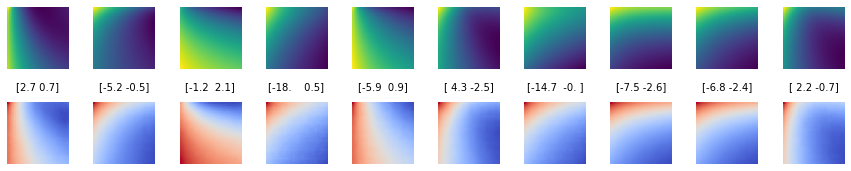

In [19]:
n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)  # generate random id
example_surface = x_test[example_idx]                          # surface
#example_surface_scaled = x_test_scaled[example_idx]            # surface from scaled data

example_surface = np.reshape(example_surface,(len(example_surface),28,28,1))
#example_surface_scaled = np.reshape(example_surface_scaled,(len(example_surface_scaled),28,28,1))

z_points = ae_sv.encoder.predict(example_surface)               # ae generated latent space representation
#z_points_scaled = ae_sv.encoder.predict(example_surface_scaled) # ae generated latent space representation

reconst_images = ae_sv.decoder.predict(z_points)                # ae generated surface 
#reconst_images_scaled = ae_sv.decoder.predict(z_points_scaled)  # ae generated surface
#reconst_images_rescaled = xinversetransform(reconst_images_scaled) # need to backtransform

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_surface[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')
    sub.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=sub.transAxes)         
    sub.imshow(img)

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img, cmap='coolwarm')#gray_r')
    
#for i in range(n_to_show):
#    img = reconst_images_scaled[i].squeeze()
#    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
#    sub.axis('off')
#    sub.imshow(img, cmap='coolwarm')#gray_r')


# Analysis starts here

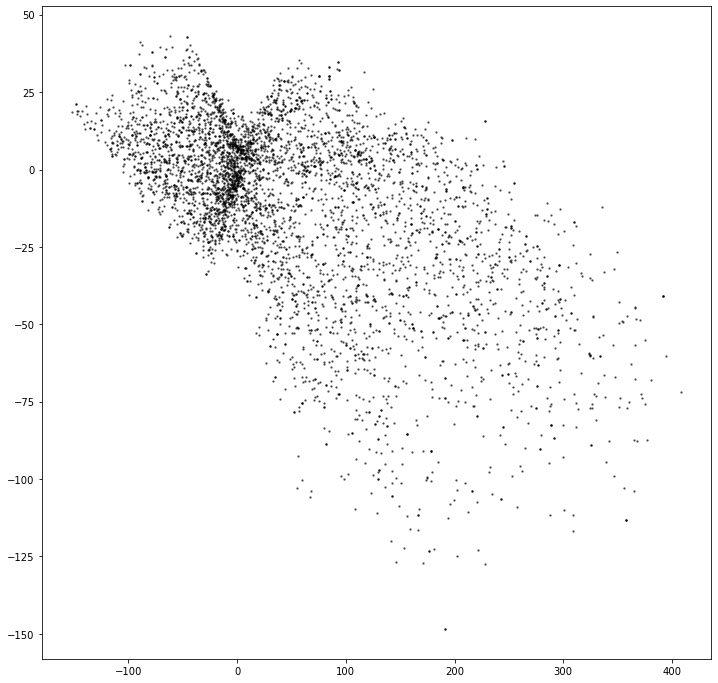

In [20]:
n_to_show = 5000
figsize = 12

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

z_points = ae_sv.encoder.predict(x_test_scaled_reshape[example_idx])
#z_points = ae_sv.encoder.predict(example_images)

min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

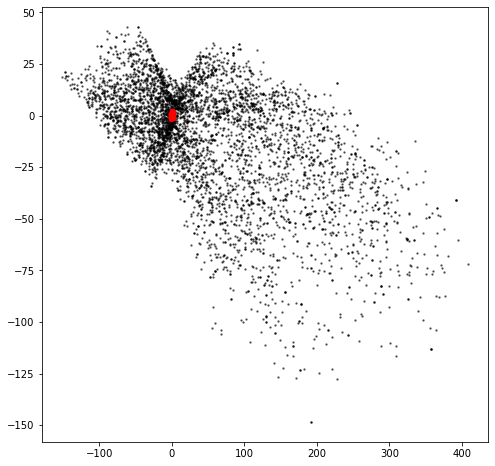

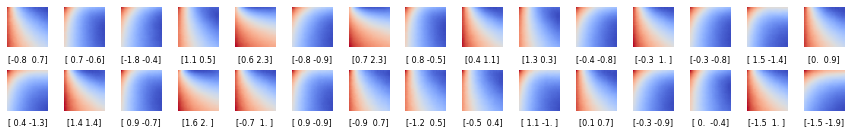

In [21]:
figsize = 8
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)


grid_size = 15
grid_depth = 2
figsize = 15

x = np.random.normal(size = grid_size * grid_depth)
y = np.random.normal(size = grid_size * grid_depth)

z_grid = np.array(list(zip(x, y)))
reconst = ae_sv.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=8, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'coolwarm')

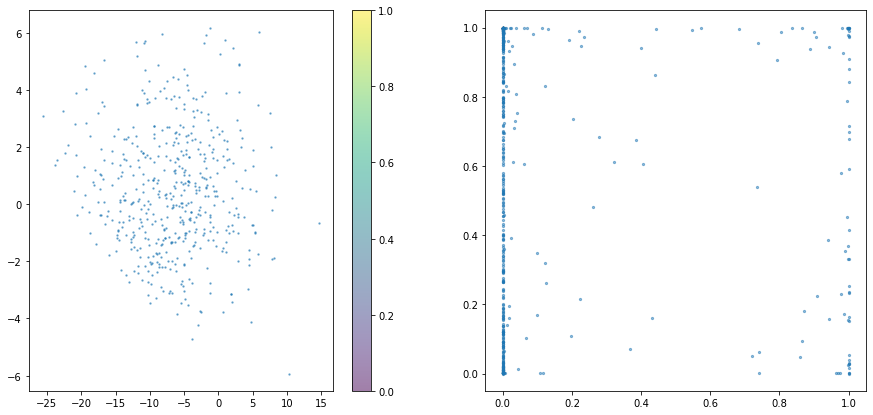

In [22]:
from scipy.stats import norm
n_to_show = 500
grid_size = 15
fig_height = 7
fig_width = 15

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test_reshape[example_idx]
example_labels = y_test[example_idx]

z_points = ae_sv.encoder.predict(example_images)
p_points = norm.cdf(z_points)

fig = plt.figure(figsize=(fig_width, fig_height))

ax = fig.add_subplot(1, 2, 1)
#plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels , alpha=0.5, s=2)
plot_1 = ax.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , alpha=0.5, s=2)
plt.colorbar(plot_1)

ax = fig.add_subplot(1, 2, 2)
#plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , c= example_labels, alpha=0.5, s=5)
plot_2 = ax.scatter(p_points[:, 0] , p_points[:, 1] , cmap='rainbow' , alpha=0.5, s=5)


plt.show()

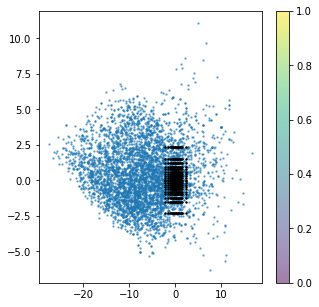

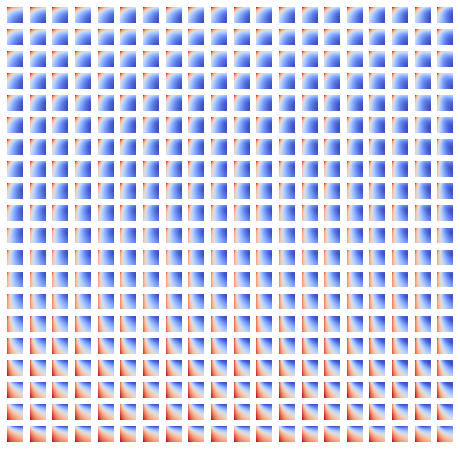

In [23]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test_reshape[example_idx]
example_labels = y_test[example_idx]

z_points = ae_sv.encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' #, c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

reconst = ae_sv.decoder.predict(z_grid)

plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black'#, cmap='rainbow' , c= example_labels
            , alpha=1, s=2)




plt.show()


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'coolwarm')